In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import MicroTools as micro
import MicroTools.plot_tools as pt

## This code perform 2D plotting or 3D with 1 parameter fixed.

In [3]:
# Our parameter scan
path_results = "fit_data/"
# data = np.load(f"{path_results}/App_gm4_Um4sq_deGouvea.npy", allow_pickle=True)
data = np.load(f"{path_results}/App_gm4_Um4sq_osc_decay_deg_g=10_Ue4Sq=0.1n=1.npy", allow_pickle=True)
data2 = np.load(f"{path_results}/App_gm4_Um4sq_osc_decay_deg_g=10_Ue4Sq=0.1n=10000.npy", allow_pickle=True)
MVec, gm4VecT = 4*0.1*data[:,3], data[:,1]**2
MiniApp_chi2 = data[:,-3]
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]

MiniApp_deltachi2 = MiniApp_chi2 - np.min(MiniApp_chi2)
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

#data2
MicroApp_chi2_2 = data2[:,-2]
MicroApp_Asimov_chi2_2 = data2[:,-1]

MicroApp_deltachi2_2 = MicroApp_chi2_2 - np.min(MicroApp_chi2_2)
MicroApp_Asimov_deltachi2_2 = MicroApp_Asimov_chi2_2 - np.min(MicroApp_Asimov_chi2_2)

# De Gouvea fit
MB = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]
MBlower = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_lower.dat')
MBupper = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_upper.dat')
MBc = np.vstack((MBlower,MBupper))
MB = np.loadtxt('MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]

# MicroBooNE official contour
muB = np.loadtxt(f'MicroTools/muB_data/official/official_contour.dat')
muBX = muB[:,0]
muBY = muB[:,1]

#print(data)
#print('MVec',MVec)
#print('gm4',gm4VecT)
#print('chi2',MiniApp_chi2)

FileNotFoundError: [Errno 2] No such file or directory: 'fit_data//App_gm4_Um4sq_osc_decay_deg_g=10_Ue4Sq=0.1n=1.npy'

NameError: name 'MicroApp_deltachi2_2' is not defined

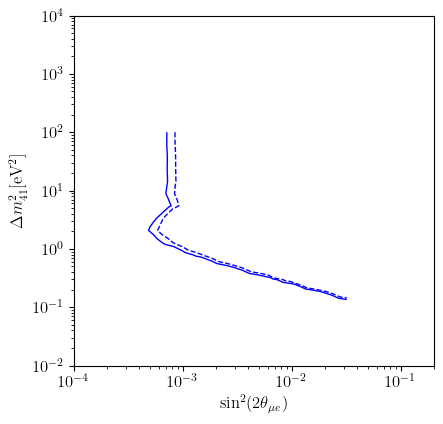

In [ ]:
fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 2e-1, 1e-2, 1e4
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
#ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=pt.font)
ax.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)
#ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
#ax.set_yticks([1e-1, 1, 10, 100])
#[l.set_size(pt.labelfont.get_size()) for l in ax.get_xticklabels()]
#[l.set_size(pt.labelfont.get_size()) for l in ax.get_yticklabels()]
#[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
#ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=pt.labelfont)
#ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=pt.labelfont)
#ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)
ax.set_xlabel(r"$\sin^2(2\theta_{\mu e})$", fontproperties=pt.font)

levs0MB = np.min(MicroApp_chi2)
levsMiniB = [0, 2.30, 6.18, 11.83]
levsMicroB = [6.18, 1e10]
ax.tricontour(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, colors = ['blue'], alpha=1, linewidths=1)
ax.tricontour(MVec, gm4VecT, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors=['blue'], alpha=1, linewidths=1, linestyles=['--'])
ax.tricontour(MVec, gm4VecT, MicroApp_deltachi2_2, levels=levsMicroB, colors = ['black'], alpha=1, linewidths=1)
ax.tricontour(MVec, gm4VecT, MicroApp_Asimov_deltachi2_2, levels=levsMicroB, colors=['black'], alpha=1, linewidths=1, linestyles=['--'])

#ax.tricontourf(MVec, gm4VecT, MiniApp_deltachi2, levels=levsMiniB, cmap='Oranges_r', alpha=1)
#ax.plot(muBX, muBY, color='red')
ax.text(2e-4, 3e-2, '$|U_{e4}|^2=0.1$\n$g=10$', fontsize = 15)
#fleft = interp1d(10**MBupper[:,1], 10**MBupper[:,0], bounds_error=False, fill_value='extrapolate')
#fright = interp1d(10**MBlower[:,1], 10**MBlower[:,0], bounds_error=False, fill_value='extrapolate')
#y = np.geomspace(np.min([10**MBupper[:,1].min(), 10**MBlower[:,1].min()]), np.max([10**MBupper[:,1].max(), 10**MBlower[:,1].max()]))
#ax.fill_betweenx(y, fleft(y), fright(y), edgecolor='black', hatch='////', facecolor='None', alpha=0.5, label='deGouvea MB $2\sigma$')
#ax.legend(loc = 'lower left', fontsize = 10)

#fig.savefig(f"{micro.path_plots}/Fixed_Ue4sq_1e-2_g=0.01.pdf", bbox_inches='tight')

## Oscillation only comparison

/tmp/ipykernel_2417419/437931546.py:28: UserWarning: The following kwargs were not used by contour: 'dashes', 'label'
  ax1.tricontour(sin2theta, dm4SQR, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5, dashes=[10, 10], linestyles='--', label='$\mu$B Asimov $\Delta \chi^2$')
/tmp/ipykernel_2417419/437931546.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.tricontour(sin2theta, dm4SQR, MiniApp_deltachi2, levels=[2.3, 11.83], colors=['lightblue','dodgerblue'], linewidths=1.5, zorder=2, label='MB $\Delta \chi^2$')


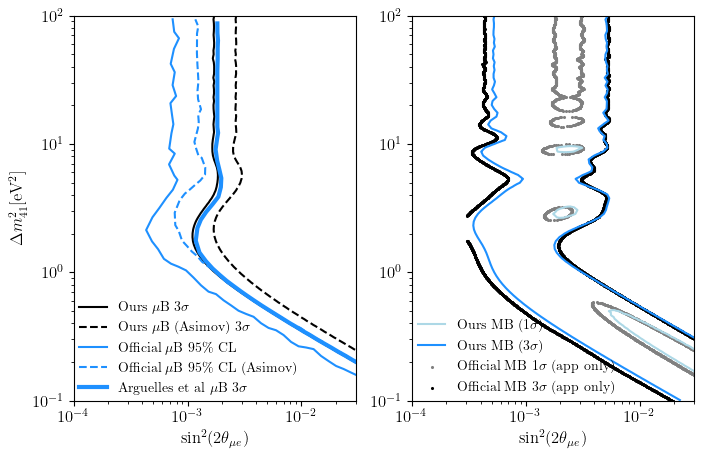

In [25]:
import matplotlib.patches as mpatches

# MicroBooNE chi2 with n, noffset=0, aka oscillation only, decoupled decay, but with Pmm and Pee.
data = np.load(f"fit_data/Oscillation_only_test_1_nodis.npy", allow_pickle=True)

sin2theta, dm4SQR = 4*data[:,2]*data[:,3], data[:,1]**2

MiniApp_chi2 = data[:,-3]
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]

MiniApp_deltachi2 = MiniApp_chi2 - np.min(MiniApp_chi2)
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

fig, axs = plt.subplots(figsize=(8,5), ncols=2)
ax1, ax2 = axs
xmin, xmax, ymin, ymax = 1e-4, 3e-2, 1e-1, 1e2
for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_xlabel(r"$\sin^2(2\theta_{\mu e})$", fontproperties=pt.font)
ax1.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)

levsMicroB = [11.83]
ax1.tricontour(sin2theta, dm4SQR, MicroApp_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5)
ax1.tricontour(sin2theta, dm4SQR, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5, dashes=[10, 10], linestyles='--', label='$\mu$B Asimov $\Delta \chi^2$')
ax2.tricontour(sin2theta, dm4SQR, MiniApp_deltachi2, levels=[2.3, 11.83], colors=['lightblue','dodgerblue'], linewidths=1.5, zorder=2, label='MB $\Delta \chi^2$')
# ax2.scatter(sin2theta, dm4SQR, s=1)

ax1.plot([], [], color='black', lw=1.5, label='Ours $\mu$B 3$\sigma$')
ax1.plot([], [], color='black', lw=1.5, ls='--', label='Ours $\mu$B (Asimov) 3$\sigma$')
ax2.plot([], [], color='lightblue', lw=1.5, label='Ours MB ($1 \sigma$)')
ax2.plot([], [], color='dodgerblue', lw=1.5, label='Ours MB ($3 \sigma$)')

# Official MiniBooNE contours 
cont = np.genfromtxt('MiniTools/include/MB_data_release_2020/fhcmode/cont_fake_oct19_contNu_1s.txt').T
ax2.scatter(cont[0], cont[1], color='grey', alpha=1, linewidth=0, s=5, label='Official MB $1\sigma$ (app only)')
cont = np.genfromtxt('MiniTools/include/MB_data_release_2020/fhcmode/cont_fake_oct19_contNu_3s.txt').T
ax2.scatter(cont[0], cont[1], color='black', alpha=1, linewidth=0, s=5, label='Official MB $3\sigma$ (app only)')

# Official MicroBooNE 95% CL contours 
cont = np.genfromtxt('MicroTools/muB_data/official/app_only_2022_official.dat').T
ax1.plot(cont[0], cont[1], color='dodgerblue', alpha=1, linewidth=1.5, label='Official $\mu$B 95\% CL')
cont = np.genfromtxt('MicroTools/muB_data/official/app_only_2022_official_sensitivity.dat').T
ax1.plot(cont[0], cont[1], color='dodgerblue', alpha=1, linewidth=1.5, linestyle='--', label='Official $\mu$B 95\% CL (Asimov)')

# Arguelles et al 3 sigma
uB_osc = np.loadtxt(f'MicroTools/muB_data/osc_only.dat').T
ax1.plot(uB_osc[0], uB_osc[1], color='dodgerblue', linewidth=3, label='Arguelles et al $\mu$B 3$\sigma$')

ax1.legend(loc=(0,0))
ax2.legend(loc=(0,0))

fig.savefig(f"{micro.path_plots}/Oscillation_only_test_nodis.pdf", bbox_inches='tight', dpi=300)

In [49]:
# MicroBooNE chi2 with n, noffset=0, aka oscillation only, decoupled decay, but with Pmm and Pee.
data = np.load(f"fit_data/Oscillation_only_fullmodel.npy", allow_pickle=True)

MiniApp_chi2 = data[:,-3]
MiniApp_deltachi2 = MiniApp_chi2 - np.min(MiniApp_chi2)

sin2theta, dm4SQR = 4*data[:,2]*data[:,3], data[:,1]**2
xy_indices = np.arange(sin2theta.size)  # An array of indices
unique_s2t = np.unique(sin2theta)
# profiled_indices = np.array([xy_indices[sin2theta == uc][MiniApp_deltachi2[sin2theta == uc].argmin()] for uc in unique_s2t])

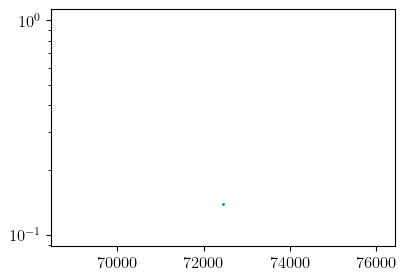

In [79]:
# plt.scatter(unique_s2t)
uniquem=np.unique(dm4SQR)
plt.scatter(np.arange(len(sin2theta))[xy_indices[MiniApp_deltachi2.argmin()]], sin2theta[xy_indices[MiniApp_deltachi2.argmin()]], s=1)
plt.yscale('log')


/tmp/ipykernel_2417419/3615884174.py:18: UserWarning: The following kwargs were not used by contour: 'dashes', 'label'
  ax1.tricontour(sin2theta, dm4SQR, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5, dashes=[10, 10], linestyles='--', label='$\mu$B Asimov $\Delta \chi^2$')
/tmp/ipykernel_2417419/3615884174.py:19: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.tricontour(sin2theta[profiled_indices], dm4SQR[profiled_indices], MiniApp_deltachi2[profiled_indices], levels=[2.3, 11.83], colors=['lightblue','dodgerblue'], linewidths=1.5, zorder=2, label='MB $\Delta \chi^2$')


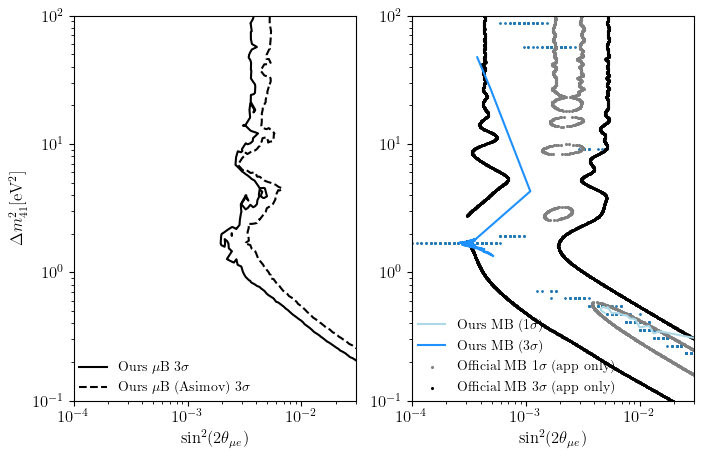

In [48]:
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

fig, axs = plt.subplots(figsize=(8,5), ncols=2)
ax1, ax2 = axs
xmin, xmax, ymin, ymax = 1e-4, 3e-2, 1e-1, 1e2
for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_xlabel(r"$\sin^2(2\theta_{\mu e})$", fontproperties=pt.font)
ax1.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)

levsMicroB = [11.83]
ax1.tricontour(sin2theta, dm4SQR, MicroApp_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5)
ax1.tricontour(sin2theta, dm4SQR, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5, dashes=[10, 10], linestyles='--', label='$\mu$B Asimov $\Delta \chi^2$')
ax2.tricontour(sin2theta[profiled_indices], dm4SQR[profiled_indices], MiniApp_deltachi2[profiled_indices], levels=[2.3, 11.83], colors=['lightblue','dodgerblue'], linewidths=1.5, zorder=2, label='MB $\Delta \chi^2$')
ax2.scatter(sin2theta[profiled_indices], dm4SQR[profiled_indices], s=1)

ax1.plot([], [], color='black', lw=1.5, label='Ours $\mu$B 3$\sigma$')
ax1.plot([], [], color='black', lw=1.5, ls='--', label='Ours $\mu$B (Asimov) 3$\sigma$')
ax2.plot([], [], color='lightblue', lw=1.5, label='Ours MB ($1 \sigma$)')
ax2.plot([], [], color='dodgerblue', lw=1.5, label='Ours MB ($3 \sigma$)')

# Official MiniBooNE contours 
cont = np.genfromtxt('MiniTools/include/MB_data_release_2020/fhcmode/cont_fake_oct19_contNu_1s.txt').T
ax2.scatter(cont[0], cont[1], color='grey', alpha=1, linewidth=0, s=5, label='Official MB $1\sigma$ (app only)')
cont = np.genfromtxt('MiniTools/include/MB_data_release_2020/fhcmode/cont_fake_oct19_contNu_3s.txt').T
ax2.scatter(cont[0], cont[1], color='black', alpha=1, linewidth=0, s=5, label='Official MB $3\sigma$ (app only)')

ax1.legend(loc=(0,0))
ax2.legend(loc=(0,0))

fig.savefig(f"{micro.path_plots}/Oscillation_only_fullmodel.pdf", bbox_inches='tight', dpi=300)

## Oscillation + Decay

<ipython-input-22-f5e6a67d987d>:28: UserWarning: The following kwargs were not used by contour: 'dashes', 'label'
  ax1.tricontour(sin2theta, dm4SQR, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5, dashes=[10, 10], linestyles='--', label='$\mu$B Asimov $\Delta \chi^2$')
<ipython-input-22-f5e6a67d987d>:29: UserWarning: No contour levels were found within the data range.
  ax2.tricontour(sin2theta, dm4SQR, MiniApp_deltachi2, levels=[2.3, 11.83], colors='black', linewidths=1.5, zorder=0, label='MB $\Delta \chi^2$')
<ipython-input-22-f5e6a67d987d>:29: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.tricontour(sin2theta, dm4SQR, MiniApp_deltachi2, levels=[2.3, 11.83], colors='black', linewidths=1.5, zorder=0, label='MB $\Delta \chi^2$')


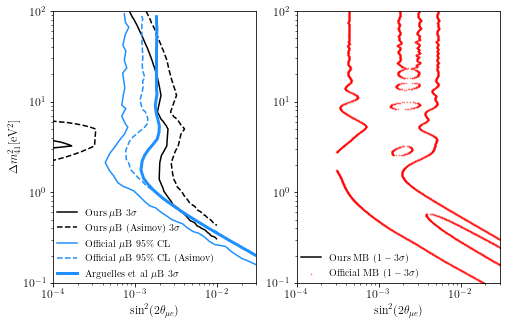

In [22]:
import matplotlib.patches as mpatches

# MicroBooNE chi2 with n, noffset=0, aka oscillation only, decoupled decay, but with Pmm and Pee.
data = np.load(f"fit_data/App_gm4_Um4sq_osc_decay_deg_g=1_Ue4Sq=0.1_test.npy", allow_pickle=True)

sin2theta, dm4SQR = 4*data[:,2]*data[:,3], data[:,1]**2

MiniApp_chi2 = data[:,-3]
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]

MiniApp_deltachi2 = MiniApp_chi2 - np.min(MiniApp_chi2)
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

fig, axs = plt.subplots(figsize=(8,5), ncols=2)
ax1, ax2 = axs
xmin, xmax, ymin, ymax = 1e-4, 3e-2, 1e-1, 1e2
for ax in [ax1, ax2]:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_xlabel(r"$\sin^2(2\theta_{\mu e})$", fontproperties=pt.font)
ax1.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)

levsMicroB = [11.83]
ax1.tricontour(sin2theta, dm4SQR, MicroApp_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5)
ax1.tricontour(sin2theta, dm4SQR, MicroApp_Asimov_deltachi2, levels=levsMicroB, colors='black', alpha=1, linewidths=1.5, dashes=[10, 10], linestyles='--', label='$\mu$B Asimov $\Delta \chi^2$')
ax2.tricontour(sin2theta, dm4SQR, MiniApp_deltachi2, levels=[2.3, 11.83], colors='black', linewidths=1.5, zorder=0, label='MB $\Delta \chi^2$')

ax1.plot([], [], color='black', lw=1.5, label='Ours $\mu$B 3$\sigma$')
ax1.plot([], [], color='black', lw=1.5, ls='--', label='Ours $\mu$B (Asimov) 3$\sigma$')
ax2.plot([], [], color='black', lw=1.5, label='Ours MB ($1-3 \sigma$)')
# Official MiniBooNE contours 
cont = np.genfromtxt('MiniTools/include/MB_data_release_2020/fhcmode/cont_fake_oct19_contNu_1s.txt').T
ax2.scatter(cont[0], cont[1], color='red', alpha=0.5, linewidth=0, s=3, label='Official MB ($1-3 \sigma$)')
cont = np.genfromtxt('MiniTools/include/MB_data_release_2020/fhcmode/cont_fake_oct19_contNu_3s.txt').T
ax2.scatter(cont[0], cont[1], color='red', alpha=0.5, linewidth=0, s=3)

# Official MicroBooNE 95% CL contours 
cont = np.genfromtxt('MicroTools/muB_data/official/app_only_2022_official.dat').T
ax1.plot(cont[0], cont[1], color='dodgerblue', alpha=1, linewidth=1.5, label='Official $\mu$B 95\% CL')
cont = np.genfromtxt('MicroTools/muB_data/official/app_only_2022_official_sensitivity.dat').T
ax1.plot(cont[0], cont[1], color='dodgerblue', alpha=1, linewidth=1.5, linestyle='--', label='Official $\mu$B 95\% CL (Asimov)')

# Arguelles et al 3 sigma
uB_osc = np.loadtxt(f'MicroTools/muB_data/osc_only.dat').T
ax1.plot(uB_osc[0], uB_osc[1], color='dodgerblue', linewidth=3, label='Arguelles et al $\mu$B 3$\sigma$')

ax1.legend(loc=(0,0))
ax2.legend(loc=(0,0))

fig.savefig(f"{micro.path_plots}/Oscillation+decay.pdf", bbox_inches='tight', dpi=300)

<ipython-input-52-816efb9d6355>:25: UserWarning: linewidths is ignored by contourf
  ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap = 'Greys', alpha=1, linewidths=1)


Text(0.5, 1.0, 'MicroBooNE 3$\\sigma$ exlusion limit')

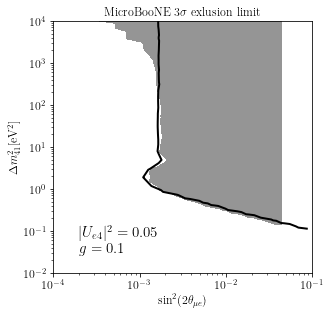

In [52]:
# MicroBooNE chi2 with n, noffset=0, aka oscillation only, decoupled decay, but with Pmm and Pee.
data = np.load(f"fit_data/App_gm4_Um4sq_osc_decay_deg_g=0.1_Ue4Sq=0.05_test.npy", allow_pickle=True)
data_osc = np.load(f"fit_data/Oscillation_only_test_1.npy", allow_pickle=True)
MVec, gm4VecT = 4*data[:,2]*data[:,3], data[:,1]**2
MicroApp_chi2 = data[:,-2]
MicroApp_Asimov_chi2 = data[:,-1]
MicroApp_deltachi2 = MicroApp_chi2 - np.min(MicroApp_chi2)
MicroApp_Asimov_deltachi2 = MicroApp_Asimov_chi2 - np.min(MicroApp_Asimov_chi2)

# oscillation only data
MVec_osc, gm4VecT_osc = 4*data_osc[:,3]*0.1, data_osc[:,1]**2
MicroApp_chi2_osc = data_osc[:,-2]
MicroApp_Asimov_chi2_osc = data_osc[:,-1]
MicroApp_deltachi2_osc = MicroApp_chi2_osc - np.min(MicroApp_chi2_osc)
MicroApp_Asimov_deltachi2_osc = MicroApp_Asimov_chi2_osc - np.min(MicroApp_Asimov_chi2_osc)

fig, ax = pt.std_fig(figsize=(pt.std_figsize[0], pt.std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1e-1, 1e-2, 1e4
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)
ax.set_xlabel(r"$\sin^2(2\theta_{\mu e})$", fontproperties=pt.font)
levsMicroB = [11.83,1e10]
ax.tricontourf(MVec, gm4VecT, MicroApp_deltachi2, levels=levsMicroB, cmap = 'Greys', alpha=1, linewidths=1)
ax.tricontour(MVec_osc, gm4VecT_osc, MicroApp_deltachi2_osc, levels=[11.83], colors = 'black', alpha=1, linewidths=2)
ax.text(2e-4, 3e-2, '', fontsize = 15)
ax.text(2e-4, 3e-2, '$|U_{e4}|^2=0.05$\n$g=0.1$', fontsize = 15)
plt.title('MicroBooNE 3$\sigma$ exlusion limit')

## Old plotting scripts

In [24]:
MuBAppDisT0 = np.load(f"{micro.path_osc_data}/App_gm4_Um4sq.npy", allow_pickle=True)
data = np.load(f"{micro.path_osc_data}/App_gm4_Um4sq_migrated_1_v2.npy", allow_pickle=True)
MuBAppDisT0_new = data[:,:-1]

PVs = np.load(f"{micro.path_osc_data}/gm4_Um4sq_PVs.npy", allow_pickle=True)
gm4VecT = PVs[0]
MVec = PVs[1]

MuBAppDisT = np.array((np.asarray(MuBAppDisT0.T[0])).reshape(len(gm4VecT), len(MVec)), dtype=float)
MuBAppDisTAs = np.array((np.asarray(MuBAppDisT0.T[1])).reshape(len(gm4VecT), len(MVec)), dtype=float)

MuBAppDisT_new = np.array((np.asarray(MuBAppDisT0_new.T[0])).reshape(len(gm4VecT), len(MVec)), dtype=float)
MuBAppDisTAs_new = np.array((np.asarray(MuBAppDisT0_new.T[1])).reshape(len(gm4VecT), len(MVec)), dtype=float)

ValueError: cannot reshape array of size 25 into shape (31,31)

In [15]:
MB = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]
MBlower = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_lower.dat')
MBupper = np.loadtxt(f'MicroTools/MB_data/DeGouvea_data/miniboone_2sigma_upper.dat')
MBc = np.vstack((MBlower,MBupper))

92.65762086182028


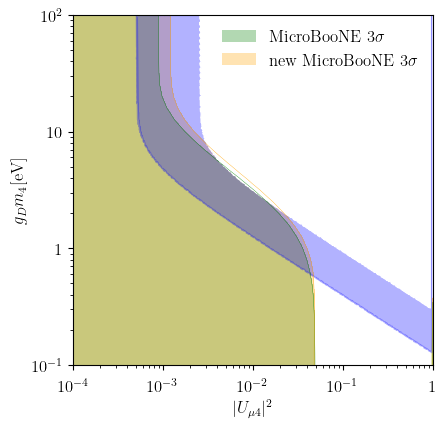

In [13]:
from MicroTools.plot_tools import *

# Load 95% contour from Miniboone.
MB = np.loadtxt('MicroTools/MB_data/DeGouvea_data/miniboone_2sigma.dat')
MBX = 10**MB[:,0]
MBY = 10**MB[:,1]

fig, ax = std_fig(figsize=(std_figsize[0], std_figsize[1]*1.5))
xmin, xmax, ymin, ymax = 1e-4, 1, 1e-1, 1e2
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_ylabel(r'$g_D m_4 [\mathrm{eV}]$', fontproperties=font)        
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_yticks([1e-1, 1, 10, 100])
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_yticklabels((r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=font)        


levs0MB = np.min(MuBAppDisT)
levs0MB_new = np.min(MuBAppDisT_new)
print(levs0MB)
#levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
levsMB = [levs0MB, levs0MB + 11.83]
levsMB_new = [levs0MB_new, levs0MB_new + 11.83]
#ax.contourf(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)
#ax.contour(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=1, linewidths=0.25)
ax.contourf(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['green','green'], alpha=0.3)
ax.contour(MVec, gm4VecT, MuBAppDisT, levels=levsMB, colors=['green','green'], alpha=1, linewidths=0.25)
ax.contourf(MVec, gm4VecT, MuBAppDisT_new, levels=levsMB_new, colors=['orange','orange'], alpha=0.3)
ax.contour(MVec, gm4VecT, MuBAppDisT_new, levels=levsMB_new, colors=['orange','orange'], alpha=1, linewidths=0.25)
# ax.fill(MBX,MBY,color='Black',alpha=0.5)

ax.fill_between(x=10**MBlower[:,0],y1=10**MBlower[:,1],y2=100,color='blue', alpha=.3)
ax.fill_between(x=10**MBupper[:,0],y1=10**MBupper[:,1],y2=100,color='white')
plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'blue', alpha = .3, label=r'MiniBooNE $2\sigma$'),

legend_elements = [plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'green', alpha = .3, label=r'MicroBooNE $3\sigma$'),
                   plt.Rectangle((0.1,0.1),0.8,0.8,fc = 'orange', alpha = .3, label=r'new MicroBooNE $3\sigma$')]
ax.legend(handles = legend_elements, loc = 'upper right', fontsize = 12)

fig.savefig(f"{micro.path_plots}/gm4_Um4sq_compare_migrated.pdf", bbox_inches='tight')